# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ernest Benedictus
- **Email:** m010d4ky1623@bangkit.academy
- **ID Dicoding:** M010D4KY1623

## Menentukan Pertanyaan Bisnis

- Stasiun mana yang mengandung paling sedikit dan paling banyak polutan di udara?
- Untuk setiap stasiun, bulan mana yang menghasilkan polutan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [84]:
aoti_df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
chang_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
ding_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
dong_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
guan_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
guc_df = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
hua_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
nong_df = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shun_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
tian_df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
wanli_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
wansho_df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

dataframes = [aoti_df, chang_df, ding_df, dong_df, guan_df, guc_df, hua_df, nong_df, shun_df, tian_df, wanli_df, wansho_df]
merged_df = pd.concat(dataframes)

air_df = merged_df.sort_values(by="station")
air_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
23384,23385,2015,10,31,8,23.0,45.0,4.0,58.0,800.0,5.0,6.0,1029.3,-1.6,0.0,E,0.7,Aotizhongxin
23383,23384,2015,10,31,7,16.0,33.0,4.0,61.0,600.0,5.0,0.8,1028.8,-2.6,0.0,WSW,0.4,Aotizhongxin
23382,23383,2015,10,31,6,19.0,32.0,4.0,62.0,500.0,6.0,0.6,1028.5,-2.3,0.0,SSW,0.4,Aotizhongxin
23381,23382,2015,10,31,5,30.0,42.0,4.0,65.0,700.0,5.0,2.7,1028.1,-2.6,0.0,ENE,1.7,Aotizhongxin


### Assessing Data

Menilai tabel air_df

In [85]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412034 non-null  float64
 6   PM10     414393 non-null  float64
 7   SO2      411849 non-null  float64
 8   NO2      409219 non-null  float64
 9   CO       400558 non-null  float64
 10  O3       408101 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [86]:
air_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8734
PM10        6375
SO2         8919
NO2        11549
CO         20210
O3         12667
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [87]:
print("Jumlah duplikasi: ", air_df.duplicated().sum())

Jumlah duplikasi:  35064


In [88]:
air_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412034.000000,414393.000000,411849.00000,409219.000000,400558.000000,408101.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.218542,105.507400,16.09816,52.001677,1251.084892,56.493207,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.766386,91.901932,21.99873,34.722781,1170.587222,56.603830,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.28560,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,37.000000,3.00000,25.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,56.000000,83.000000,7.00000,45.000000,900.000000,43.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,146.000000,20.00000,72.000000,1500.000000,81.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.00000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

#### Membersihkan air_df

##### Duplikasi Data

In [89]:
air_df.duplicated().sum()

35064

In [90]:
air_df.drop_duplicates(inplace=True)

In [91]:
print("Jumlah duplikasi: ", air_df.duplicated().sum())

Jumlah duplikasi:  0


##### Null Values

In [92]:
air_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       7960
PM10        5793
SO2         8291
NO2        10882
CO         18689
O3         12063
TEMP         345
PRES         343
DEWP         350
RAIN         339
wd          1682
WSPM         275
station        0
dtype: int64

Mengetahui bahwa seluruh kolom yang memiliki null values bertipe data numerik, saya akan mencari standar deviasi dari setiap kolom.

In [93]:
cols_with_na = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
std = air_df[cols_with_na].std()
std

PM2.5      81.438777
PM10       92.568743
SO2        22.086848
NO2        35.074517
CO       1176.153565
O3         56.808346
TEMP       11.442473
PRES       10.454143
DEWP       13.787806
RAIN        0.826914
WSPM        1.239848
dtype: float64

Karena standar deviasi cenderung tinggi untuk kolom-kolom tersebut, saya akan menggunakan media untuk mengisi null values.

In [94]:
air_df[cols_with_na] = air_df[cols_with_na].fillna(air_df[cols_with_na].median())

air_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1682
WSPM          0
station       0
dtype: int64

WD (Wind Direction) akan saya abaikan karena data bertipe kategorikal dan seharusnya tidak berdampak pada yang ditimbulkan oleh kota itu sendiri.

##### Inaccurate Values

In [95]:
air_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.529412,106.154324,16.025798,52.529699,1242.664110,55.941942,13.526480,1011.018072,2.580905,0.064792,1.718205
std,10122.118037,1.177198,3.448708,8.800103,6.922196,80.672666,91.911675,21.880530,34.594087,1149.907661,55.961274,11.437392,10.449498,13.781562,0.826553,1.239435
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,26.000000,500.000000,10.000000,3.100000,1002.500000,-8.800000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,56.000000,84.000000,8.000000,46.000000,900.000000,43.000000,14.500000,1010.700000,3.200000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,146.000000,20.000000,72.000000,1500.000000,79.000000,23.200000,1019.200000,15.200000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Nilai Max dan Min untuk **year**, **month**, **day**, **hour** dan **temp** masuk akal. Selebihnya, saya perlu mengakui saya belum memiliki cukup banyak pengetahuan tentang angka yang masuk akal untuk indikator-indikator polutan. Maka dari itu, tidak ada penanganan inaccurate values.

##### Mengetahui Outliers

In [96]:
num_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

air_df_outliers = air_df[num_cols].copy()

def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

outliers_cnt = air_df_outliers.apply(count_outliers)

print(outliers_cnt)

PM2.5    18744
PM10     13993
SO2      33987
NO2       7517
CO       26939
O3       17086
TEMP         0
PRES         0
DEWP         0
RAIN     15170
WSPM     20541
dtype: int64


Karena fungsi Data Preprocessing bukan untuk Modelling, saya tidak mengimplementasi penanganan Outlier untuk dataframe ini.

## Exploratory Data Analysis (EDA)

### Explore ...

#### Eksplorasi 1: Distribusi data partikel 2.5 dan 10 mm

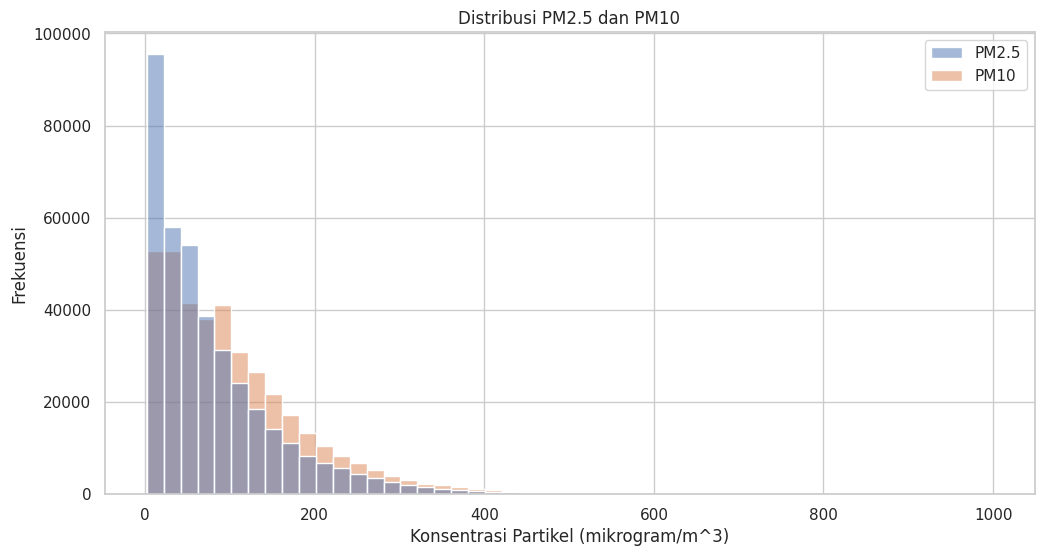

In [97]:
plt.figure(figsize=(12, 6))
sns.histplot(data=air_df[['PM2.5', 'PM10']], bins=50)
plt.title('Distribusi PM2.5 dan PM10')
plt.xlabel('Konsentrasi Partikel (mikrogram/m^3)')
plt.ylabel('Frekuensi')
plt.show()

Dari histogram di atas, dapat dilihat bahwa di sebagian besar waktu yang tercatat sebagai entri data, nilai PM2.5 dan PM10 memiliki nilai rendah (sekitar 0-20 mikrogram per meter kubik)

#### Eksplorasi 2: Korelasi Cuaca (suhu, tekanan udara, dan kecepatan angin) dengan konsentrasi Partikel polutan di udara

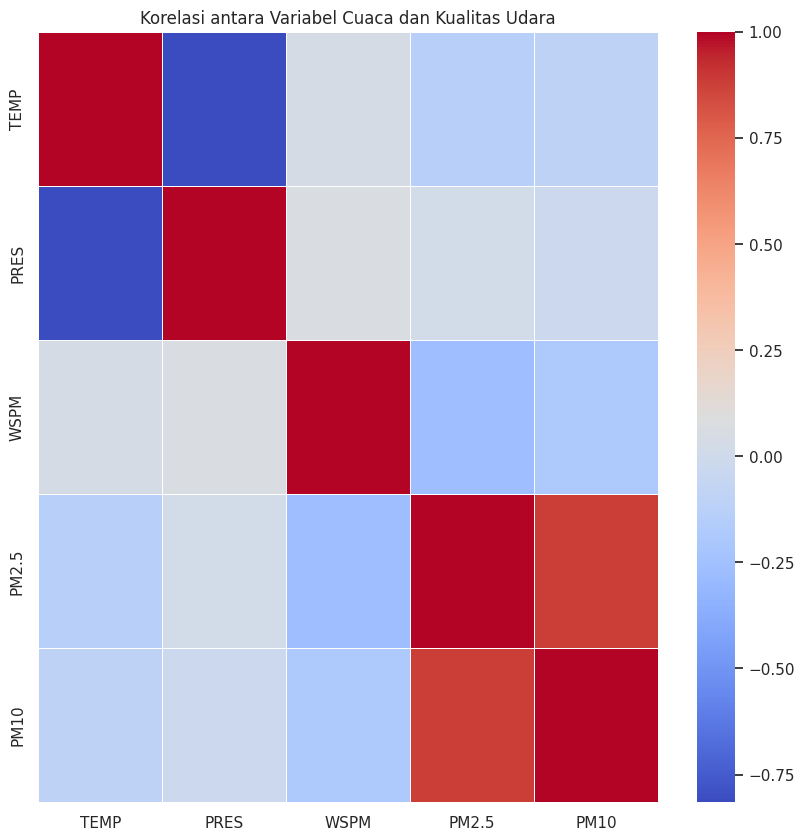

In [98]:
weather_polutant_corr = air_df[['TEMP', 'PRES', 'WSPM', 'PM2.5', 'PM10']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(weather_polutant_corr, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelasi antara Variabel Cuaca dan Kualitas Udara')
plt.show()

Pasangan variabel dengan korelasinya:
Rendah (-0.4 , 0.4):
1. PM2.5 dan WSPM
2. PM2.5 dan PRES
3. PM2.5 dan TEMP
4. PM10 dan WSPM
5. PM10 dan PRES
6. PM10 dan TEMP
7. WSPM dan PRES
8. WSPM dan TEMP

Sedang (-0.7 , -0.4 && 0.4 , 0.7)

-

Kuat(-1.0 , -0.8 && 0.8 , 1.0):
1. PM2.5 dan PM10
2. TEMP dan PRES

#### Eksplorasi 3: Clustering

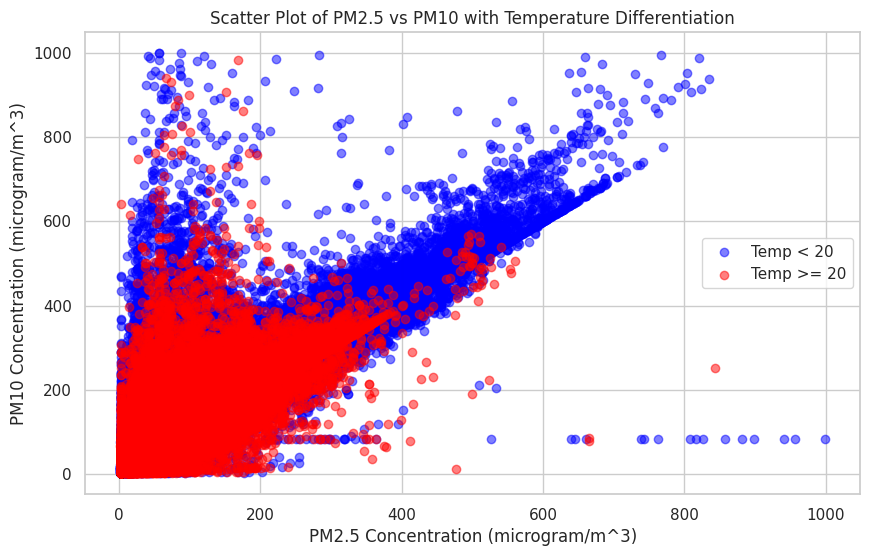

In [99]:
df_subset = air_df[['PM2.5', 'PM10', 'TEMP']]

temp_below_20 = df_subset[df_subset['TEMP'] < 20]
temp_above_20 = df_subset[df_subset['TEMP'] >= 20]

plt.figure(figsize=(10, 6))
plt.scatter(temp_below_20['PM2.5'], temp_below_20['PM10'], color='blue', label='Temp < 20', alpha=0.5)
plt.scatter(temp_above_20['PM2.5'], temp_above_20['PM10'], color='red', label='Temp >= 20', alpha=0.5)

plt.title('Scatter Plot of PM2.5 vs PM10 with Temperature Differentiation')
plt.xlabel('PM2.5 Concentration (microgram/m^3)')
plt.ylabel('PM10 Concentration (microgram/m^3)')
plt.legend()
plt.show()

Dari tabel di atas, dapat ditemukan bahwa konsentrasi PM2.5 dan PM10 cenderung lebih tinggi saat suhu berada di bawah 20 derajat celcius.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Stasiun mana yang mengandung paling sedikit dan paling banyak polutan partikel di udara?

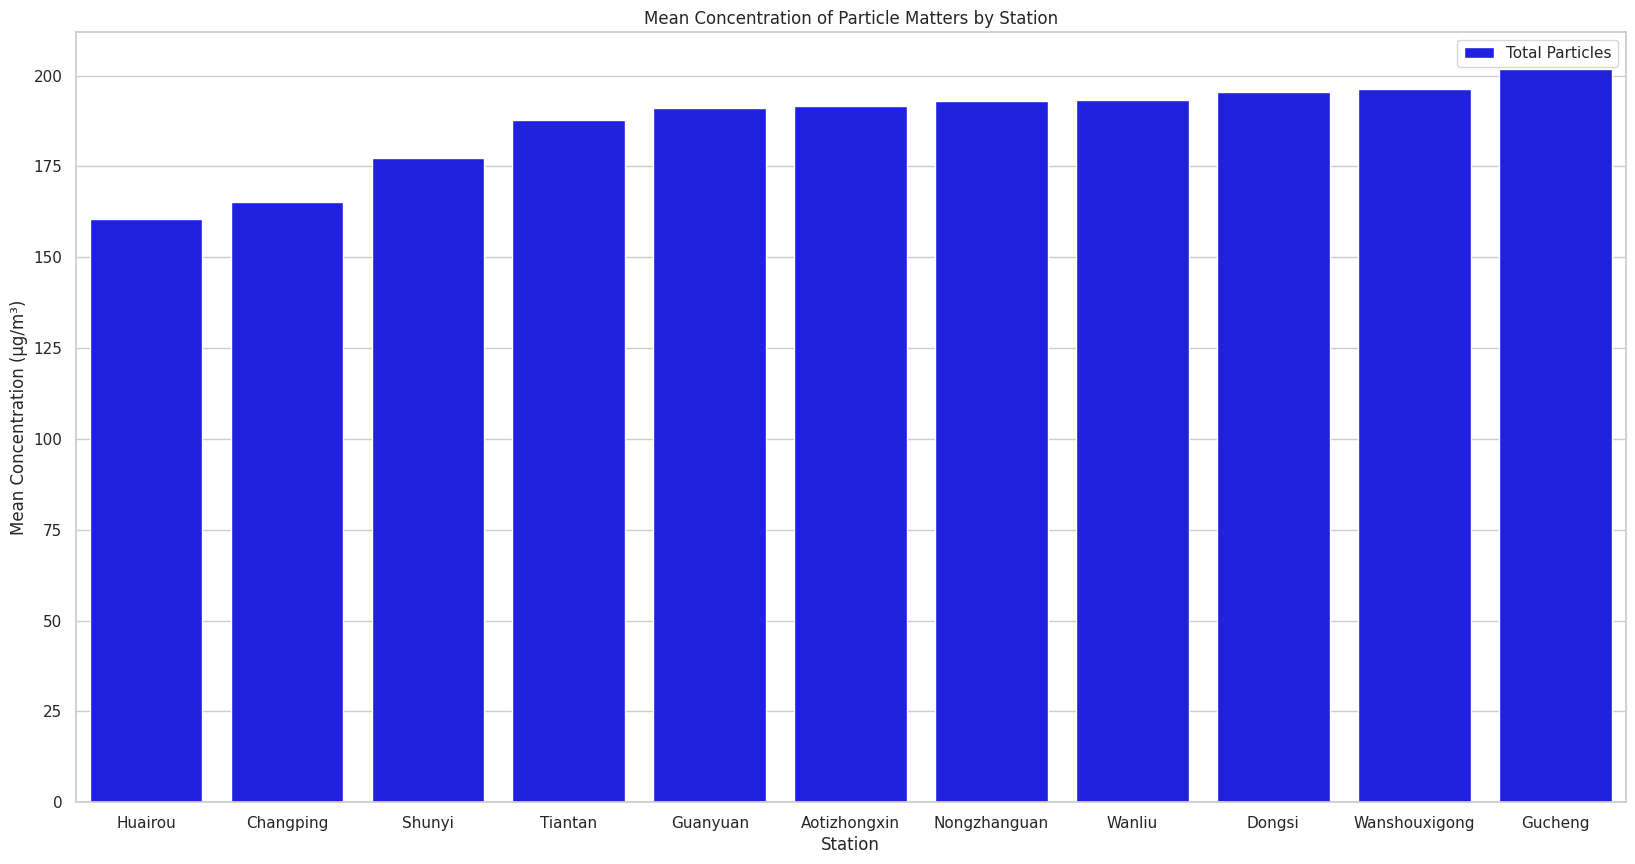

In [100]:
plt.figure(figsize=(20, 10))

station_mean_concentration = air_df.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()

station_mean_concentration['Total'] = station_mean_concentration['PM2.5'] + station_mean_concentration['PM10']

sorted_station_mean = station_mean_concentration.sort_values(by=['Total'])


sns.barplot(x='station', y='Total', data=sorted_station_mean, color='blue', label='Total Particles')

plt.title('Mean Concentration of Particle Matters by Station')
plt.xlabel('Station')
plt.ylabel('Mean Concentration (µg/m³)')
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana tren rata-rata polutan partikel dan gas setiap tahunnya?

Saya akan merepresentasikan tren dengan sumbu Y sebagai mean konsentrasi per tahun dan sumbu X sebagai tahun.

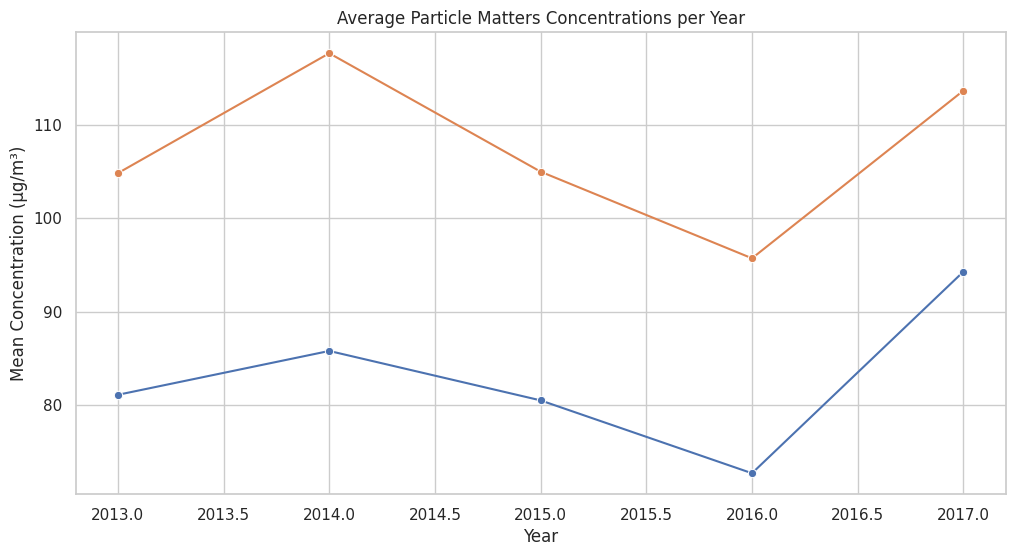

In [101]:
# PM2.5 dan PM10

plt.figure(figsize=(12, 6))

sns.lineplot(data=air_df.groupby('year')['PM2.5'].mean().reset_index(), x='year', y='PM2.5', marker='o')
sns.lineplot(data=air_df.groupby('year')['PM10'].mean().reset_index(), x='year', y='PM10', marker='o')

plt.title('Average Particle Matters Concentrations per Year')
plt.xlabel('Year')
plt.ylabel('Mean Concentration (µg/m³)')
plt.show()

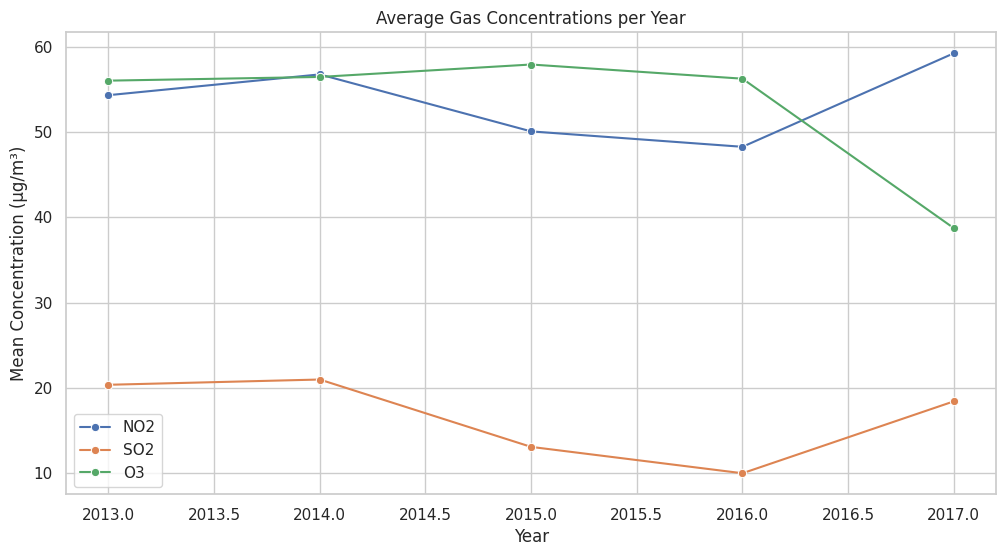

In [102]:
# NO2, SO2, dan 03

plt.figure(figsize=(12, 6))

sns.lineplot(data=air_df.groupby('year')['NO2'].mean().reset_index(), x='year', y='NO2', marker='o', label='NO2')
sns.lineplot(data=air_df.groupby('year')['SO2'].mean().reset_index(), x='year', y='SO2', marker='o', label='SO2')
sns.lineplot(data=air_df.groupby('year')['O3'].mean().reset_index(), x='year', y='O3', marker='o', label='O3')

plt.title('Average Gas Concentrations per Year')
plt.xlabel('Year')
plt.ylabel('Mean Concentration (µg/m³)')
plt.show()

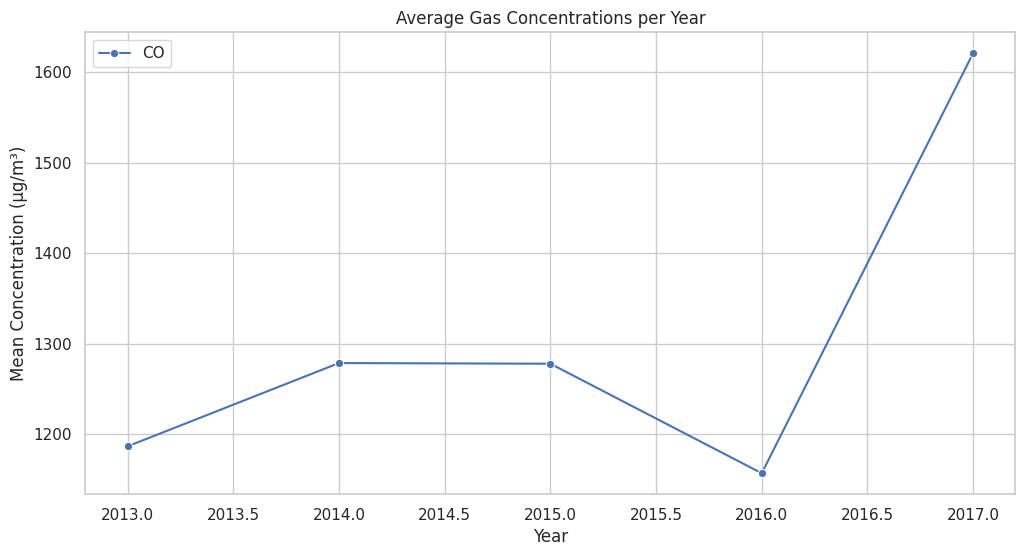

In [103]:
# Agar tidak misleading, grafik untuk CO dipisah karna nilainya relatif lebih besar
plt.figure(figsize=(12, 6))

sns.lineplot(data=air_df.groupby('year')['CO'].mean().reset_index(), x='year', y='CO', marker='o', label='CO')

plt.title('Average Gas Concentrations per Year')
plt.xlabel('Year')
plt.ylabel('Mean Concentration (µg/m³)')
plt.show()

## Conclusion

Analisis Pertanyaan 1:
- Stasiun Huairou memiliki nilai gabungan rata-rata PM2.5 dan PM10 paling rendah (sekitar 160)
- Stasiun Gucheng memiliki nilai gabungan rata-rata PM2.5 dan PM10 paling tinggi (sekitar 205)

Analisis Pertanyaan 2:
- Nilai PM2.5, PM10, dan NO2 memiliki tren yang meningkat dari 2013 ke 2014, turun hingga 2016, dan meningkat lagi ke 2017
- Nilai CO meningkat dari 2013 ke 2014, stabil hingga 2015, turun hingga 2016, dan meningkat pada tahun 2016 ke 2017
- Nilai SO2 stabil pada 2013-2014, lalu menurun hingga 2016, dan naik lagi pada 2016-2017
- Nilai O3 cenderung stabil pada 2013-2015, lalu turun hingga 2017

In [104]:
air_df.to_csv("air_df.csv", index=False)
